In [1]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
from glob import glob

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

In [5]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2020-01-18 11:20:40--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  31.9MB/s    in 14s     

2020-01-18 11:20:56 (29.9 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [6]:
!ls

Food-5K.zip  sample_data


In [0]:
!unzip -qq -o Food-5K.zip

In [8]:
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [9]:
cd Food-5K/

/content/Food-5K


In [10]:
!ls

evaluation  training  validation


In [11]:
cd ..

/content


In [12]:
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [13]:
# We will only use training & validation. Ignore evaluation
!ls Food-5K/training/

0_0.jpg     0_1387.jpg	0_422.jpg  0_809.jpg   1_1195.jpg  1_230.jpg  1_617.jpg
0_1000.jpg  0_1388.jpg	0_423.jpg  0_80.jpg    1_1196.jpg  1_231.jpg  1_618.jpg
0_1001.jpg  0_1389.jpg	0_424.jpg  0_810.jpg   1_1197.jpg  1_232.jpg  1_619.jpg
0_1002.jpg  0_138.jpg	0_425.jpg  0_811.jpg   1_1198.jpg  1_233.jpg  1_61.jpg
0_1003.jpg  0_1390.jpg	0_426.jpg  0_812.jpg   1_1199.jpg  1_234.jpg  1_620.jpg
0_1004.jpg  0_1391.jpg	0_427.jpg  0_813.jpg   1_119.jpg   1_235.jpg  1_621.jpg
0_1005.jpg  0_1392.jpg	0_428.jpg  0_814.jpg   1_11.jpg    1_236.jpg  1_622.jpg
0_1006.jpg  0_1393.jpg	0_429.jpg  0_815.jpg   1_1200.jpg  1_237.jpg  1_623.jpg
0_1007.jpg  0_1394.jpg	0_42.jpg   0_816.jpg   1_1201.jpg  1_238.jpg  1_624.jpg
0_1008.jpg  0_1395.jpg	0_430.jpg  0_817.jpg   1_1202.jpg  1_239.jpg  1_625.jpg
0_1009.jpg  0_1396.jpg	0_431.jpg  0_818.jpg   1_1203.jpg  1_23.jpg   1_626.jpg
0_100.jpg   0_1397.jpg	0_432.jpg  0_819.jpg   1_1204.jpg  1_240.jpg  1_627.jpg
0_1010.jpg  0_1398.jpg	0_433.jpg  0_81.jpg    1_1205.j

In [14]:
!ls Food-5K/validation/

0_0.jpg    0_229.jpg  0_358.jpg  0_487.jpg  1_165.jpg  1_294.jpg  1_422.jpg
0_100.jpg  0_22.jpg   0_359.jpg  0_488.jpg  1_166.jpg  1_295.jpg  1_423.jpg
0_101.jpg  0_230.jpg  0_35.jpg	 0_489.jpg  1_167.jpg  1_296.jpg  1_424.jpg
0_102.jpg  0_231.jpg  0_360.jpg  0_48.jpg   1_168.jpg  1_297.jpg  1_425.jpg
0_103.jpg  0_232.jpg  0_361.jpg  0_490.jpg  1_169.jpg  1_298.jpg  1_426.jpg
0_104.jpg  0_233.jpg  0_362.jpg  0_491.jpg  1_16.jpg   1_299.jpg  1_427.jpg
0_105.jpg  0_234.jpg  0_363.jpg  0_492.jpg  1_170.jpg  1_29.jpg   1_428.jpg
0_106.jpg  0_235.jpg  0_364.jpg  0_493.jpg  1_171.jpg  1_2.jpg	  1_429.jpg
0_107.jpg  0_236.jpg  0_365.jpg  0_494.jpg  1_172.jpg  1_300.jpg  1_42.jpg
0_108.jpg  0_237.jpg  0_366.jpg  0_495.jpg  1_173.jpg  1_301.jpg  1_430.jpg
0_109.jpg  0_238.jpg  0_367.jpg  0_496.jpg  1_174.jpg  1_302.jpg  1_431.jpg
0_10.jpg   0_239.jpg  0_368.jpg  0_497.jpg  1_175.jpg  1_303.jpg  1_432.jpg
0_110.jpg  0_23.jpg   0_369.jpg  0_498.jpg  1_176.jpg  1_304.jpg  1_433.jpg
0_111.jpg  0_24

In [15]:
# use imread for reading images that are not loaded
# A simple call to the imread method loads our image as a multi-dimensional NumPy array (one for each Red, Green, and Blue component, respectively) 
# and imshow displays our image to our screen.
# gives error without /content
image_t = mpimg.imread('/content/Food-5K/training/0_0.jpg')
image_t.shape

(640, 469, 3)

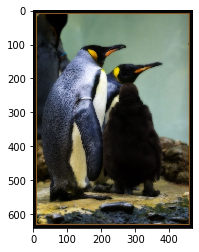

In [16]:
plt.imshow(image_t)

In [17]:
# use imread for reading images that are not loaded
image_v = mpimg.imread('/content/Food-5K/validation/1_0.jpg')
image_v.shape

(382, 512, 3)

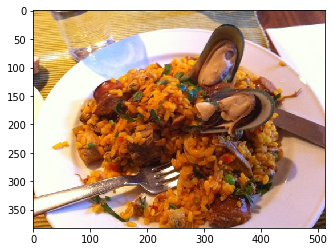

In [18]:
plt.imshow(image_v)

In [0]:
# Make directories to store the data Keras-style
!mkdir data
!mkdir data/train
!mkdir data/test
!mkdir data/train/food
!mkdir data/train/nonfood
!mkdir data/test/food
!mkdir data/test/nonfood

In [0]:
# Move the images
!mv Food-5K/training/1*.jpg data/train/food
!mv Food-5K/training/0*.jpg data/train/nonfood
!mv Food-5K/validation/1*.jpg data/test/food
!mv Food-5K/validation/0*.jpg data/test/nonfood

In [0]:
train_dir = 'data/train'
test_dir = 'data/test'

In [22]:
num_food_train = len(glob(train_dir + '/food/*.jpg'))
num_nonfood_train = len(glob(train_dir + '/nonfood/*.jpg'))
num_food_test = len(glob(test_dir + '/food/*.jpg'))
num_nonfood_test = len(glob(test_dir + '/nonfood/*.jpg'))

print('total train food images:', num_food_train)
print('total train nonfood images:', num_nonfood_train)
print('total test food images:', num_food_test)
print('total test nonfood images:', num_nonfood_test)
print('')

total_train = len(glob(train_dir + '/*/*.jpg'))
total_test = len(glob(test_dir + '/*/*.jpg'))

print("Total train images:", total_train)
print("Total test images:", total_test)

total train food images: 1500
total train nonfood images: 1500
total test food images: 500
total test nonfood images: 500

Total train images: 3000
Total test images: 1000


In [23]:
# useful for getting number of classes
folders = glob(train_dir + '/*')
print(folders)
K = len(folders)
print(K)

['data/train/nonfood', 'data/train/food']
2


In [0]:
# re-size all the images to this
IMAGE_SIZE = [100, 100]

batch_size = 32

steps_per_epoch = total_train // batch_size         # 3000 // 32
# print(steps_per_epoch)        93

steps_per_epoch_test = total_test // batch_size     # 1000 // 32
# print(steps_per_epoch_test)   312

In [0]:
image_gen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

image_gen_test = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [26]:
train_generator = image_gen_train.flow_from_directory(
    train_dir,
    target_size = IMAGE_SIZE,
    shuffle = True,
    batch_size = batch_size
)

test_generator = image_gen_test.flow_from_directory(
    test_dir,
    target_size = IMAGE_SIZE,
    shuffle = True,
    batch_size = batch_size
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# Not needed but just in case
# print(train_generator[0][0].shape)           (32, 100, 100, 3)
# print(test_generator[0][0].shape)            (32, 100, 100, 3)
input_shape = train_generator[0][0][0].shape
# print(input_shape)                           (100, 100, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


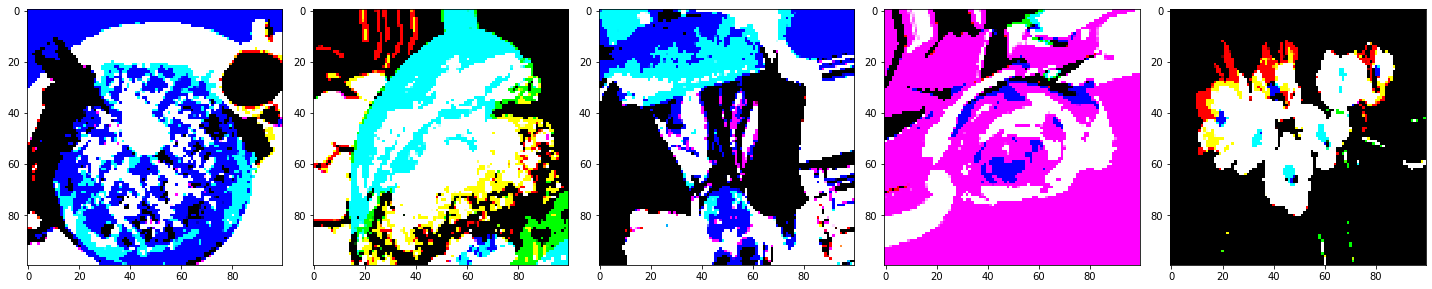

In [28]:
# The data should be preprocessed properly. This has been done by passing (preprocessing_function=preprocess_input) above which 
# reorders the channels from RGB to BGR
# should be a strangely colored images (due to VGG weights being BGR)
sample_training_images, _ = next(train_generator)
# print(sample_training_images.shape)          (32, 100, 100, 3)

def plotImages(images_arr):
  # print(images_arr.shape)                    (5, 100, 100, 3)
  fig, axes = plt.subplots(1, 5, figsize=(20,5))
  # print(axes.shape)                          (5,)
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImages(sample_training_images[:5])

In [29]:
vgg = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)          # same as input_shape=IMAGE_SIZE + [3]

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
# print(vgg.input.shape)             (None, 100, 100, 3)
# print(vgg.output.shape)            (None, 3, 3, 512)

In [0]:
# freeze pretrained model weights
vgg.trainable = False

# same as 
# for layer in vgg.layers:
#   layer.trainable = False

In [0]:
# Keras image data generator returns classes one-hot encoded by default. Hence in model.compile we will use categorical_crossentropy & NOT sparse_categorical_crossentropy

# Build the model using the functional API
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
x = Dense(K, activation='softmax')(x)

In [0]:
# create a model object. Again based on the functional API. See Lazy's https://colab.research.google.com/drive/1pdzZ2MB2g6CT_-bT0D0bO2IKyghOhlM_
model = Model(inputs=vgg.input, outputs=x)

In [0]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [36]:
EPOCHS = 10
r = model.fit_generator(
    train_generator,
    validation_data = test_generator,
    epochs = EPOCHS,
    steps_per_epoch = steps_per_epoch,
    validation_steps = steps_per_epoch_test
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 93 steps, validate for 31 steps
Epoch 1/10
93/93 [==============================] - 33s 357ms/step - loss: 2.0073 - accuracy: 0.8905 - val_loss: 0.9181 - val_accuracy: 0.9536
Epoch 2/10
93/93 [==============================] - 26s 282ms/step - loss: 1.2306 - accuracy: 0.9306 - val_loss: 0.9939 - val_accuracy: 0.9435
Epoch 3/10
93/93 [==============================] - 26s 278ms/step - loss: 0.9510 - accuracy: 0.9451 - val_loss: 0.9503 - val_accuracy: 0.9506
Epoch 4/10
93/93 [==============================] - 26s 282ms/step - loss: 0.8693 - accuracy: 0.9549 - val_loss: 0.8165 - val_accuracy: 0.9657
Epoch 5/10
93/93 [==============================] - 26s 281ms/step - loss: 0.9589 - accuracy: 0.9458 - val_loss: 0.7734 - val_accuracy: 0.9627
Epoch 6/10
93/93 [==============================] - 26s 281ms/step - loss: 0.8262 - accuracy: 0.9505 - val_loss: 0.77

Text(0.5, 1.0, 'Training & Test Loss')

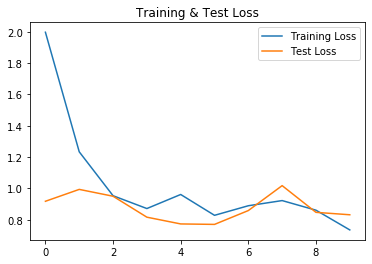

In [37]:
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Training & Test Loss')

Text(0.5, 1.0, 'Training & Test Accuracy')

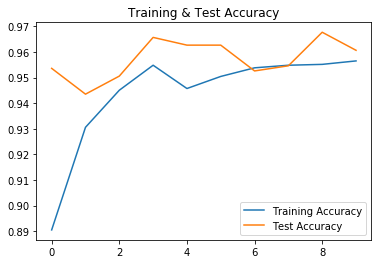

In [38]:
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Training & Test Accuracy')

In [42]:
# create a 2nd train generator which does not use data augmentation by using image_gen_test 
# to get the true train accuracy

train_generator2 = image_gen_test.flow_from_directory(
    train_dir,
    target_size = IMAGE_SIZE,
    batch_size = batch_size
)

model.evaluate_generator(
    train_generator2,
    steps=steps_per_epoch
)

Found 3000 images belonging to 2 classes.
  ...
    to  
  ['...']


[0.420565953144808, 0.9811828]